# Data Prep

## Read in csv

In [1]:
#Import pandas and read in csv files
import pandas as pd

df = pd.read_csv('Updated CapMetro Bikes.csv')

#Set display to allow all the columns to be displayed
pd.set_option('display.max_columns',None)

#Check head
df.head()

,trip_id,membership_type,bicycle_id,bike_type,checkout_datetime,checkout_date,checkout_time,checkout_kiosk_id,checkout_kiosk,return_kiosk_id,return_kiosk,trip_duration_minutes,month,year,time_of_day,day_of_week,checkout_day,hour,time_period,log_trip_duration,season,route
0,16459203,Local365,37,classic,12/01/2017 09:51:41 AM,2017-12-01,09:51:41,2496,8th & Congress,2495,4th & Congress,3,12,2017,AM,Friday,1,9,Off-Peak,1.098612,Winter,4th & Congress to 8th & Congress
1,4106422,Local365,971,classic,03/13/2015 04:20:24 PM,2015-03-13,16:20:24,2495,4th & Congress,2495,4th & Congress,14,3,2015,PM,Friday,13,16,Evening Rush,2.639057,Spring,4th & Congress to 4th & Congress
2,3454605,Local365,29,classic,10/14/2014 08:33:54 AM,2014-10-14,08:33:54,2712,Toomey Rd @ South Lamar,2575,Riverside & South Lamar,22,10,2014,AM,Tuesday,14,8,Morning Commute,3.091042,Fall,Riverside & South Lamar to Toomey Rd @ South L...
3,3454592,Local365,646,classic,10/14/2014 08:32:03 AM,2014-10-14,08:32:03,2552,3rd & West,2496,8th & Congress,29,10,2014,AM,Tuesday,14,8,Morning Commute,3.367296,Fall,3rd & West to 8th & Congress
4,4106421,24 Hour Walk Up Pass,124,classic,03/13/2015 04:20:15 PM,2015-03-13,16:20:15,2498,Dean Keeton & Speedway,2549,Long Center @ South 1st & Riverside,10,3,2015,PM,Friday,13,16,Evening Rush,2.302585,Spring,Dean Keeton & Speedway to Long Center @ South ...


## Filter data

In [2]:
#Filter data from years 2019-2024
df = df[df['year'] >= 2019]

In [3]:
#Check result
df['year'].min()

np.int64(2019)

In [4]:
#Check shape
df.shape

(1173724, 22)

## Check for missing values

In [4]:
#Check missing values
df.isnull().sum()

trip_id                  0
membership_type          0
bicycle_id               0
bike_type                0
checkout_datetime        0
checkout_date            0
checkout_time            0
checkout_kiosk_id        0
checkout_kiosk           0
return_kiosk_id          0
return_kiosk             0
trip_duration_minutes    0
month                    0
year                     0
time_of_day              0
day_of_week              0
checkout_day             0
hour                     0
time_period              0
log_trip_duration        0
season                   0
route                    0
dtype: int64

## Feature Engineering: Aggregate Dataset

In [4]:
#Calculate total checkouts
total_checkouts = df.groupby('checkout_kiosk').size().reset_index(name='total_checkouts').sort_values(by='total_checkouts', ascending=False)
total_checkouts.head()

,checkout_kiosk,total_checkouts
12,21st & Speedway @ PCL,114918
53,Dean Keeton & Speedway,57722
21,28th & Rio Grande,47024
20,26th & Nueces,45685
54,Dean Keeton & Whitis,43695


In [5]:
#Check info
total_checkouts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 12 to 61
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   checkout_kiosk   100 non-null    object
 1   total_checkouts  100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [6]:
#Calculate total returns
total_returns = df.groupby('return_kiosk').size().reset_index(name='total_returns').sort_values(by='total_returns', ascending=False)
total_returns.head()

,return_kiosk,total_returns
12,21st & Speedway @ PCL,116786
55,Dean Keeton & Speedway,61678
21,28th & Rio Grande,45093
56,Dean Keeton & Whitis,43232
20,26th & Nueces,42957


In [6]:
#Check info
total_returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 12 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   return_kiosk   103 non-null    object
 1   total_returns  103 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
#Merge both total checkouts and total returns 
kiosks = pd.merge(total_checkouts,total_returns, left_on='checkout_kiosk', right_on='return_kiosk', how='left')

#Check result
kiosks

,checkout_kiosk,total_checkouts,return_kiosk,total_returns
0,21st & Speedway @ PCL,114918,21st & Speedway @ PCL,116786.0
1,Dean Keeton & Speedway,57722,Dean Keeton & Speedway,61678.0
2,28th & Rio Grande,47024,28th & Rio Grande,45093.0
3,26th & Nueces,45685,26th & Nueces,42957.0
4,Dean Keeton & Whitis,43695,Dean Keeton & Whitis,43232.0
...,...,...,...,...
95,13th & Trinity,495,13th & Trinity,535.0
96,Red River & 8th Street,377,NaN,NaN
97,1701 Barton Springs Road,182,1701 Barton Springs Road,120.0
98,4th & Neches @ MetroRail Downtown,37,4th & Neches @ MetroRail Downtown,44.0


In [8]:
#Select return_kiosk that are null 
kiosks[kiosks['return_kiosk'].isna()]

,checkout_kiosk,total_checkouts,return_kiosk,total_returns
8,Rainey St @ Cummings,28632,NaN,NaN
19,Nueces @ 3rd,15264,NaN,NaN
33,Sterzing & Barton Springs,12818,NaN,NaN
60,East 6th & Pedernales,5503,NaN,NaN
76,East 11th & Victory Grill,2943,NaN,NaN
96,Red River & 8th Street,377,NaN,NaN


In [ ]:
#Check return Kiosk for 8th and Red River
total_returns[total_returns['return_kiosk'].str.contains('Red River')]

,return_kiosk,total_returns
86,Red River & Cesar Chavez @ The Fairmont,8368
42,8th & Red River,5906
0,10th & Red River,2566


In [9]:
#Fill in for Red River & 8th Street
kiosks.loc[96, 'return_kiosk'] = 'Red River & 8th Street'
kiosks.loc[96, 'total_returns'] = 5906

In [10]:
#Chck return kiosk for Rainey St @ Cummings
total_returns[total_returns['return_kiosk'].str.contains('Rainey')]

,return_kiosk,total_returns
84,Rainey @ Cummings,27832
82,Rainey & Davis,5980
83,Rainey & Driskill,4853
53,Davis at Rainey Street,834


In [10]:
#Fill in missing values for Rainey Street @ Cummings
kiosks.loc[8, 'return_kiosk'] = 'Rainey St @ Cummings'
kiosks.loc[8, 'total_returns'] = 27832

In [12]:
#Check missing values for Neuces @ 3rd
total_returns[total_returns['return_kiosk'].str.contains('Nueces')]

,return_kiosk,total_returns
20,26th & Nueces,42957
24,3rd & Nueces,15911


In [11]:
#Fill in missing values on Kiosk dataframe
kiosks.loc[19, 'return_kiosk'] = 'Nueces @ 3rd'
kiosks.loc[19, 'total_returns'] = 15911

In [14]:
#Check missing values for Sterzing & Barton Springs
total_returns[total_returns['return_kiosk'].str.contains('Sterzing')]

,return_kiosk,total_returns
98,Sterzing @ Barton Springs,13574


In [12]:
#Fill in missing data on Kiosk data for Sterzing & Barton Springs
kiosks.loc[33, 'return_kiosk'] = 'Sterzing & Barton Springs'
kiosks.loc[33, 'total_returns'] = 13574

In [16]:
#Check missing data for East 6th & Pedernales
total_returns[total_returns['return_kiosk'].str.contains('East 6th')]

,return_kiosk,total_returns
64,East 6th & Medina,13269
65,East 6th & Pedernales St.,5251
66,East 6th & Robert T. Martinez,4809


In [13]:
#Fill in missing data on Kiosk dataframe for East 6th & Pedernales
kiosks.loc[60, 'return_kiosk'] = 'East 6th & Pedernales'
kiosks.loc[60, 'total_returns'] = 5251

In [19]:
#Check missing data for East 11th & Victory Grill
total_returns[total_returns['return_kiosk'].str.contains('East 11th')]

,return_kiosk,total_returns
57,East 11th & San Marcos,4422
58,East 11th @ Victory Grill,2425


In [14]:
#Fill in missing data on Kiosk dataframe for East 11th & Victory Grill
kiosks.loc[76, 'return_kiosk'] = 'East 11th & Victory Grill'
kiosks.loc[76, 'total_returns'] = 2425

In [15]:
#Recheck missing values
kiosks.isnull().sum()

checkout_kiosk     0
total_checkouts    0
return_kiosk       0
total_returns      0
dtype: int64

In [24]:
#Check datatypes
kiosks.dtypes

checkout_kiosk      object
total_checkouts      int64
return_kiosk        object
total_returns      float64
dtype: object

In [16]:
#Change dtypes for consistency
kiosks['total_returns'] = kiosks['total_returns'].astype(int)

In [17]:
#Check result
kiosks['total_returns'].dtype

dtype('int64')

In [27]:
#Check top kiosks
kiosks.sort_values(by=['total_checkouts', 'total_returns'], ascending=[False, False]).head(10)

,checkout_kiosk,total_checkouts,return_kiosk,total_returns
0,21st & Speedway @ PCL,114918,21st & Speedway @ PCL,116786
1,Dean Keeton & Speedway,57722,Dean Keeton & Speedway,61678
2,28th & Rio Grande,47024,28th & Rio Grande,45093
3,26th & Nueces,45685,26th & Nueces,42957
4,Dean Keeton & Whitis,43695,Dean Keeton & Whitis,43232
5,21st & Guadalupe,41656,21st & Guadalupe,40541
6,22nd & Pearl,35497,22nd & Pearl,32660
7,Guadalupe & West Mall @ University Co-op,32712,Guadalupe & West Mall @ University Co-op,32602
8,Rainey St @ Cummings,28632,Rainey St @ Cummings,27832
9,23rd & San Jacinto @ DKR Stadium,25372,23rd & San Jacinto @ DKR Stadium,29095


In [18]:
#Check missing values
kiosks.isnull().sum()

checkout_kiosk     0
total_checkouts    0
return_kiosk       0
total_returns      0
dtype: int64

In [19]:
#Calculate total_activity
kiosks['total_activity'] = kiosks['total_checkouts'] + kiosks['total_returns']

#View results
kiosks.head()

,checkout_kiosk,total_checkouts,return_kiosk,total_returns,total_activity
0,21st & Speedway @ PCL,114918,21st & Speedway @ PCL,116786,231704
1,Dean Keeton & Speedway,57722,Dean Keeton & Speedway,61678,119400
2,28th & Rio Grande,47024,28th & Rio Grande,45093,92117
3,26th & Nueces,45685,26th & Nueces,42957,88642
4,Dean Keeton & Whitis,43695,Dean Keeton & Whitis,43232,86927


In [20]:
#Drop return_kiosk and rename checkout_kiosk
kiosks.drop(columns='return_kiosk',inplace=True)

#Rename checkout_kiosk
kiosks.rename(columns={'checkout_kiosk':'kiosk'},inplace=True)

#View result
kiosks.head()

,kiosk,total_checkouts,total_returns,total_activity
0,21st & Speedway @ PCL,114918,116786,231704
1,Dean Keeton & Speedway,57722,61678,119400
2,28th & Rio Grande,47024,45093,92117
3,26th & Nueces,45685,42957,88642
4,Dean Keeton & Whitis,43695,43232,86927


## Join latitude and longitude onto Kiosk Dataframe

In [21]:
#Read in bike locations csv file
kiosk_locs = pd.read_csv('Austin_MetroBike_Kiosk_Locations.csv')

#View data
kiosk_locs.head()

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
0,3464,Pease Park,closed,"(30.28118, -97.75219)",1155 Kingsbury St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,01/04/2021 12:00:00 AM
1,1002,6th & Navasota St.,closed,"(30.26383, -97.72864)",1308 W. 6th St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,01/04/2021 12:00:00 AM
2,1007,Lavaca & 6th,closed,"(30.26889, -97.74525)",601 Lavaca St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,01/04/2021 12:00:00 AM
3,2707,Rainey St @ Cummings,active,"(30.255906, -97.739949)",1 Rainey St,NaN,16597.0,parkland,17.0,solar,50.0,5.0,parkland at ROW/easement,9,NaN,03/04/2022 10:38:00 AM
4,3838,Nueces & 26th,active,"(30.29068, -97.74292)",600 W. 26th St.,NaN,16744.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,9,NaN,01/04/2021 12:00:00 AM


In [22]:
#Merge based off Kiosk Name
kiosks = pd.merge(kiosks, kiosk_locs[['Kiosk Name', 'Location']], left_on='kiosk', right_on='Kiosk Name', how='left')

#View results
kiosks.head()

,kiosk,total_checkouts,total_returns,total_activity,Kiosk Name,Location
0,21st & Speedway @ PCL,114918,116786,231704,NaN,NaN
1,Dean Keeton & Speedway,57722,61678,119400,Dean Keeton & Speedway,"(30.28953, -97.73695)"
2,28th & Rio Grande,47024,45093,92117,NaN,NaN
3,26th & Nueces,45685,42957,88642,NaN,NaN
4,Dean Keeton & Whitis,43695,43232,86927,Dean Keeton & Whitis,"(30.2898, -97.74041)"


In [23]:
#Check null values
kiosks.isnull().sum()

kiosk               0
total_checkouts     0
total_returns       0
total_activity      0
Kiosk Name         50
Location           50
dtype: int64

In [34]:
#Find Null values
kiosks[kiosks['Kiosk Name'].isna()]

,kiosk,total_checkouts,total_returns,total_activity,Kiosk Name,Location
0,21st & Speedway @ PCL,114918,116786,231704,NaN,NaN
2,28th & Rio Grande,47024,45093,92117,NaN,NaN
3,26th & Nueces,45685,42957,88642,NaN,NaN
5,21st & Guadalupe,41656,40541,82197,NaN,NaN
7,Guadalupe & West Mall @ University Co-op,32712,32602,65314,NaN,NaN
11,Riverside & South Lamar,24518,24284,48802,NaN,NaN
14,23rd & Pearl,20053,19759,39812,NaN,NaN
17,Electric Drive & Sandra Muraida Way @ Pfluger ...,16883,16668,33551,NaN,NaN
18,22.5 & Rio Grande,16077,15688,31765,NaN,NaN
22,3rd & Trinity @ The Convention Center,14681,15036,29717,NaN,NaN


In [24]:
#Make a dummy dataframe and join on kisok_id instead
dummy_df = pd.merge(df[['checkout_kiosk', 'checkout_kiosk_id']], kiosk_locs[['Kiosk Name', 'Kiosk ID','Location']], left_on='checkout_kiosk_id',
                    right_on='Kiosk ID', how='left')
#Check result
dummy_df.head()

,checkout_kiosk,checkout_kiosk_id,Kiosk Name,Kiosk ID,Location
0,Barton Springs @ Kinney Ave,2711,Barton Springs @ Kinney Ave,2711.0,"(30.262, -97.76118)"
1,Barton Springs Pool,2572,Barton Springs Pool,2572.0,"(30.26452, -97.7712)"
2,2nd & Congress,2494,2nd & Congress,2494.0,"(30.26408, -97.74355)"
3,3rd & Trinity @ The Convention Center,2539,Convention Center / 3rd & Trinity,2539.0,"(30.26426, -97.74023)"
4,2nd & Congress,2494,2nd & Congress,2494.0,"(30.26408, -97.74355)"


In [25]:
#Check missing values
dummy_df.isnull().sum()

checkout_kiosk            0
checkout_kiosk_id         0
Kiosk Name           110576
Kiosk ID             110576
Location             110576
dtype: int64

In [25]:
#Find rows where 'Kiosk Name' is null
null_kiosk_names = dummy_df[dummy_df['Kiosk Name'].isnull()]

#Display the rows with missing 'Kiosk Name'
null_kiosk_names[['checkout_kiosk', 'checkout_kiosk_id', 'Kiosk Name']].head()

,checkout_kiosk,checkout_kiosk_id,Kiosk Name
18,28th & Rio Grande,7189,NaN
20,23rd & Pearl,7125,NaN
28,South Congress & Mary,7187,NaN
36,Barton Springs & Riverside,7253,NaN
45,22.5 & Rio Grande,4938,NaN


In [25]:
#Get all missing kiosks
null_kiosk_names['checkout_kiosk'].unique()

array(['28th & Rio Grande', '23rd & Pearl', 'South Congress & Mary',
       'Barton Springs & Riverside', '22.5 & Rio Grande', '22nd & Pearl',
       'Rio Grande & 12th', '13th & Trinity @ Waterloo Greenway',
       'Dean Keeton & Park Place', 'One Texas Center',
       '23rd & San Gabriel', '13th & Trinity', '1701 Barton Springs Road'],
      dtype=object)

In [26]:
#Update the dataframe with the correct latitude and longitude for "28th & Rio Grande" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "28th & Rio Grande", 'Location'] = '(30.29290,-97.74387)'

In [27]:
#Update the dataframe with the correct latitude and longitude for the "23rd & Pearl" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "23rd & Pearl", 'Location'] = '(30.28734, -97.74632)'

In [28]:
#Update the dataframe with the correct latitude and longitude for the "South Congress & Mary" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "South Congress & Mary", 'Location'] = '(30.24506, -97.75118)'

In [29]:
#Update the dataframe with the correct latitude and longitude for the "Barton Springs & Riverside" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "Barton Springs & Riverside", 'Location'] = '(30.25872, -97.74865)'

In [30]:
#Update the dataframe with the correct latitude and longitude for the "22.5 & Rio Grande" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "22.5 & Rio Grande", 'Location'] = '(30.28613, -97.74483)'

In [31]:
#Update the dataframe with the correct latitude and longitude for the "22nd & Pearl" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "22nd & Pearl", 'Location'] = '(30.28526, -97.74663)'

In [32]:
#Update the dataframe with the correct latitude and longitude for the "Rio Grande & 12th" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "Rio Grande & 12th", 'Location'] = '(30.27640, -97.74744)'

In [33]:
#Update the dataframe with the correct latitude and longitude for the "13th & Trinity @ Waterloo Greenway" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "13th & Trinity @ Waterloo Greenway", 'Location'] = '(30.27392, -97.73658)'

In [34]:
#Update the dataframe with the correct latitude and longitude for the "Dean Keeton & Park Place" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "Dean Keeton & Park Place", 'Location'] = '(30.289455, -97.733749)'

In [35]:
#Update the dataframe with the correct latitude and longitude for the "One Texas Center" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "One Texas Center", 'Location'] = '(30.25743, -97.74925)'

In [36]:
#Update the dataframe with the correct latitude and longitude for the "23rd & San Gabriel" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "23rd & San Gabriel", 'Location'] = '(30.28718, -97.74792)'

In [37]:
#Update the dataframe with the correct latitude and longitude for the "13th & Trinity" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "13th & Trinity", 'Location'] = '(30.27392, -97.73658)'

In [38]:
#Update the dataframe with the correct latitude and longitude for the "1701 Barton Springs Road" location
dummy_df.loc[dummy_df['checkout_kiosk'] == "1701 Barton Springs Road", 'Location'] = '(30.26275, -97.76278)'

In [39]:
#Check if there's still missing values
dummy_df.isnull().sum()

checkout_kiosk            0
checkout_kiosk_id         0
Kiosk Name           110576
Kiosk ID             110576
Location                  0
dtype: int64

Was able to get rid of all the missing Location null values which was our goal.

In [40]:
#Get list of Kiosk without a Location
missing_locations = kiosks[kiosks['Location'].isna()]
missing_locations.head()

,kiosk,total_checkouts,total_returns,total_activity,Kiosk Name,Location
0,21st & Speedway @ PCL,114918,116786,231704,NaN,NaN
2,28th & Rio Grande,47024,45093,92117,NaN,NaN
3,26th & Nueces,45685,42957,88642,NaN,NaN
5,21st & Guadalupe,41656,40541,82197,NaN,NaN
7,Guadalupe & West Mall @ University Co-op,32712,32602,65314,NaN,NaN


In [41]:
#Get unique list of Kiosk names for missing locations
missing_locations['kiosk'].unique()

array(['21st & Speedway @ PCL', '28th & Rio Grande', '26th & Nueces',
       '21st & Guadalupe', 'Guadalupe & West Mall @ University Co-op',
       'Riverside & South Lamar', '23rd & Pearl',
       'Electric Drive & Sandra Muraida Way @ Pfluger Ped Bridge',
       '22.5 & Rio Grande', '3rd & Trinity @ The Convention Center',
       'Veterans & Atlanta @ MoPac Ped Bridge',
       'Nash Hernandez & East @ RBJ South', '2nd & Lavaca @ City Hall',
       'Barton Springs & Bouldin @ Palmer Auditorium',
       'East 6th & Medina', '11th & Congress @ The Texas Capitol',
       'Sterzing & Barton Springs',
       'South Congress & Barton Springs @ The Austin American-Statesman',
       'Cesar Chavez & Congress', '16th & San Antonio',
       'Red River & Cesar Chavez @ The Fairmont',
       '4th & Guadalupe @ Republic Square', '9th & Henderson',
       '6th & West', '4th & Sabine', '6th & Trinity', '8th & Red River',
       'Rainey & Davis', 'East 6th & Pedernales', '6th & Brazos',
       'Raine

I'll use the filled in Locations from the dummy_df to fill in the location for the Kiosk dataframe. The issue with the join was that some of the Kiosk names weren't in the locations dataframe. As a result it let to a bunch of missing values. Instead I used dummy_df to join based off checkout_kiosk_id, which led to less missing values. Then for the missing values I filled it in by finding the exact coordinates on the internt. 

In [42]:
kiosk_locs

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
0,3464,Pease Park,closed,"(30.28118, -97.75219)",1155 Kingsbury St,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,01/04/2021 12:00:00 AM
1,1002,6th & Navasota St.,closed,"(30.26383, -97.72864)",1308 W. 6th St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,01/04/2021 12:00:00 AM
2,1007,Lavaca & 6th,closed,"(30.26889, -97.74525)",601 Lavaca St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,01/04/2021 12:00:00 AM
3,2707,Rainey St @ Cummings,active,"(30.255906, -97.739949)",1 Rainey St,NaN,16597.00,parkland,17.00,solar,50.00,5.00,parkland at ROW/easement,9,NaN,03/04/2022 10:38:00 AM
4,3838,Nueces & 26th,active,"(30.29068, -97.74292)",600 W. 26th St.,NaN,16744.00,undetermined_parking,13.00,solar,40.00,5.00,NaN,9,NaN,01/04/2021 12:00:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,4060,Red River/Cesar Chavez @ The Fairmont,active,"(30.26214, -97.7387)",101 Red River St.,NaN,32691.00,sidewalk,13.00,solar,40.00,5.00,NaN,9,NaN,01/04/2021 12:00:00 AM
98,4062,Lakeshore & Pleasant Valley,active,"(30.24258, -97.71726)",2525 South Lakeshore Boulevard,NaN,32711.00,nonmetered_parking,18.00,solar,55.00,5.00,NaN,3,NaN,01/04/2021 12:00:00 AM
99,4699,East 5th/Shady @ Eastside Bus Plaza,active,"(30.25212, -97.69807)",5104 East 5th. Street,NaN,32522.00,sidewalk,10.00,solar,15.00,10.00,NaN,3,NaN,07/27/2021 08:25:00 AM
100,4879,16th/San Antonio,active,"(30.27924, -97.74371)",1601 San Antonio Street,NaN,16739.00,paid_parking,12.00,solar,40.00,5.00,NaN,9,NaN,03/12/2021 01:15:00 PM


### Fill in missing Locations

In [43]:
kiosk_locs[kiosk_locs['Kiosk Name'].str.startswith('3rd')]

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
41,2552,3rd & West,active,"(30.2678, -97.75189)",652 W. 3rd St,NaN,16727.00,paid_parking,13.00,solar,40.00,5.00,NaN,9,NaN,01/04/2021 12:00:00 AM


In [44]:
#Pull up checkout_kiosk
dummy_df[dummy_df['checkout_kiosk'] == 'East 5th & Shady Ln'].head()

,checkout_kiosk,checkout_kiosk_id,Kiosk Name,Kiosk ID,Location
756054,East 5th & Shady Ln,4699,East 5th/Shady @ Eastside Bus Plaza,4699.00,"(30.25212, -97.69807)"
758557,East 5th & Shady Ln,4699,East 5th/Shady @ Eastside Bus Plaza,4699.00,"(30.25212, -97.69807)"
761859,East 5th & Shady Ln,4699,East 5th/Shady @ Eastside Bus Plaza,4699.00,"(30.25212, -97.69807)"
764044,East 5th & Shady Ln,4699,East 5th/Shady @ Eastside Bus Plaza,4699.00,"(30.25212, -97.69807)"
764746,East 5th & Shady Ln,4699,East 5th/Shady @ Eastside Bus Plaza,4699.00,"(30.25212, -97.69807)"


In [40]:
#Fill in missing value for Kiosk dataframe
kiosks.loc[kiosks['kiosk'] == '21st & Speedway @ PCL', 'Location'] = '(30.283, -97.7375)'
kiosks.loc[kiosks['kiosk'] == '28th & Rio Grande', 'Location'] = '(30.29290,-97.74387)'
kiosks.loc[kiosks['kiosk'] == '26th & Nueces', 'Location'] = '(30.29068, -97.74292)'
kiosks.loc[kiosks['kiosk'] == '21st & Guadalupe', 'Location'] = '(30.28395, -97.74198)'
kiosks.loc[kiosks['kiosk'] == 'Guadalupe & West Mall @ University Co-op', 'Location'] = '(30.28576, -97.74181)'
kiosks.loc[kiosks['kiosk'] == 'Riverside & South Lamar', 'Location'] = '(30.26446, -97.75665)'
kiosks.loc[kiosks['kiosk'] == '23rd & Pearl', 'Location'] = '(30.28734, -97.74632)'
kiosks.loc[kiosks['kiosk'] == 'Electric Drive & Sandra Muraida Way @ Pfluger Ped Bridge', 'Location'] = '(30.26717, -97.75484)'
kiosks.loc[kiosks['kiosk'] == '22.5 & Rio Grande', 'Location'] = '(30.28613, -97.74483)'
kiosks.loc[kiosks['kiosk'] == '3rd & Trinity @ The Convention Center', 'Location'] = '(30.26426, -97.74023)'
kiosks.loc[kiosks['kiosk'] == 'Veterans & Atlanta @ MoPac Ped Bridge', 'Location'] = '(30.27466, -97.77028)'
kiosks.loc[kiosks['kiosk'] == 'Nash Hernandez & East @ RBJ South', 'Location'] = '(30.252, -97.7346)'
kiosks.loc[kiosks['kiosk'] == '2nd & Lavaca @ City Hall', 'Location'] = '(30.26476, -97.74678)'
kiosks.loc[kiosks['kiosk'] == 'Barton Springs & Bouldin @ Palmer Auditorium', 'Location'] = '(30.25971, -97.75346)'
kiosks.loc[kiosks['kiosk'] == 'East 6th & Medina', 'Location'] = '(30.26455, -97.73165)'
kiosks.loc[kiosks['kiosk'] == '11th & Congress @ The Texas Capitol', 'Location'] = '(30.2726, -97.74127)'
kiosks.loc[kiosks['kiosk'] == 'Sterzing & Barton Springs', 'Location'] = '(30.26406, -97.76385)'
kiosks.loc[kiosks['kiosk'] == 'South Congress & Barton Springs @ The Austin American-Statesman', 'Location'] = '(30.25839, -97.74592)'
kiosks.loc[kiosks['kiosk'] == 'Cesar Chavez & Congress', 'Location'] = '(30.26332, -97.74508)'
kiosks.loc[kiosks['kiosk'] == '16th & San Antonio', 'Location'] = '(30.27924, -97.74371)'
kiosks.loc[kiosks['kiosk'] == 'Red River & Cesar Chavez @ The Fairmont', 'Location'] = '(30.26214, -97.7387)'
kiosks.loc[kiosks['kiosk'] == '4th & Guadalupe @ Republic Square', 'Location'] = '(30.26753, -97.74805)'
kiosks.loc[kiosks['kiosk'] == '9th & Henderson', 'Location'] = '(30.27217, -97.75246)'
kiosks.loc[kiosks['kiosk'] == '6th & West', 'Location'] = '(30.27041, -97.75046)'
kiosks.loc[kiosks['kiosk'] == '4th & Sabine', 'Location'] = '(30.264327, -97.736446)'
kiosks.loc[kiosks['kiosk'] == '6th & Trinity', 'Location'] = '(30.26735, -97.73933)'
kiosks.loc[kiosks['kiosk'] == '8th & Red River', 'Location'] = '(30.26854, -97.73646)'
kiosks.loc[kiosks['kiosk'] == 'Rainey & Davis', 'Location'] = '(30.260814, -97.738086)'
kiosks.loc[kiosks['kiosk'] == 'East 6th & Pedernales', 'Location'] = '(30.25895, -97.71475)'
kiosks.loc[kiosks['kiosk'] == '6th & Brazos', 'Location']  = '(30.26754, -97.74154)'
kiosks.loc[kiosks['kiosk'] == 'Rainey & Driskill', 'Location'] = '(30.260814, -97.738086)'
kiosks.loc[kiosks['kiosk'] == 'East 6th & Robert T. Martinez', 'Location'] = '(30.26032, -97.71899)'
kiosks.loc[kiosks['kiosk'] == 'East 11th & San Marcos', 'Location'] = '(30.26968, -97.73074)'
kiosks.loc[kiosks['kiosk'] == 'East 5th & Broadway @ Capital Metro HQ', 'Location'] = '(30.2563, -97.71007)'
kiosks.loc[kiosks['kiosk'] == '12th & San Jacinto @ State Capitol Visitors Garage', 'Location'] = '(30.27336, -97.73805)'
kiosks.loc[kiosks['kiosk'] == 'South Congress & Mary', 'Location'] = '(30.24506, -97.75118)'
kiosks.loc[kiosks['kiosk'] == '8th & San Jacinto', 'Location'] = '(30.26912, -97.73986)'
kiosks.loc[kiosks['kiosk'] == 'Rio Grande & 12th', 'Location'] = '(30.27640, -97.74744)'
kiosks.loc[kiosks['kiosk'] == '6th & Lavaca', 'Location'] = '(30.268887, -97.745242)'
kiosks.loc[kiosks['kiosk'] == 'Dean Keeton & Park Place', 'Location'] = '(30.289455, -97.733749)'
kiosks.loc[kiosks['kiosk'] == 'East 11th & Victory Grill', 'Location'] = '(30.26896, -97.72843)'
kiosks.loc[kiosks['kiosk'] == 'East 5th & Shady @ Eastside Bus Plaza', 'Location'] = '(30.25212, -97.69807)'
kiosks.loc[kiosks['kiosk'] == '13th & Trinity @ Waterloo Greenway', 'Location'] = '(30.27392, -97.73658)'
kiosks.loc[kiosks['kiosk'] == 'One Texas Center', 'Location'] = '(30.25743, -97.74925)'
kiosks.loc[kiosks['kiosk'] == 'Davis at Rainey Street', 'Location'] = '(30.26083, -97.73826)'
kiosks.loc[kiosks['kiosk'] == '5th & Guadalupe @ Republic Square', 'Location'] = '(30.26753, -97.74805)'
kiosks.loc[kiosks['kiosk'] == 'Convention Center & 4th St. @ MetroRail', 'Location'] = '(30.264327, -97.736446)'
kiosks.loc[kiosks['kiosk'] == '1701 Barton Springs Road', 'Location'] = '(30.26275, -97.76278)'
kiosks.loc[kiosks['kiosk'] == '4th & Neches @ MetroRail Downtown', 'Location'] = '(30.264327, -97.736446)'
kiosks.loc[kiosks['kiosk'] == 'East 5th & Shady Ln', 'Location'] = '(30.25212, -97.69807)'

In [41]:
#Check missing values
kiosks.isnull().sum()

kiosk               0
total_checkouts     0
total_returns       0
total_activity      0
Kiosk Name         50
Location            0
dtype: int64

Got rid of all the missing values in Location.

In [42]:
#Drop Kiosk Name
kiosks.drop(columns='Kiosk Name', inplace=True)

In [43]:
#Set display options for max column width (to get full text)
pd.set_option('display.max_colwidth',None)

In [44]:
#Find Kiosk that share the same Location
shared_locations = kiosks.groupby('Location')['kiosk'].apply(list).reset_index()
shared_locations = shared_locations[shared_locations['kiosk'].str.len() > 1]
shared_locations

,Location,kiosk
5,"(30.252, -97.7346)","[Nash Hernandez & East @ RBJ South, Nash Hernandez @ RBJ South]"
6,"(30.25212, -97.69807)","[East 5th & Shady @ Eastside Bus Plaza, East 5th & Shady Ln]"
18,"(30.25971, -97.75346)","[Barton Springs & Bouldin @ Palmer Auditorium, Palmer Auditorium]"
21,"(30.260814, -97.738086)","[Rainey & Davis, Rainey & Driskill]"
33,"(30.264327, -97.736446)","[4th & Sabine, Convention Center & 4th St. @ MetroRail, 4th & Neches @ MetroRail Downtown]"
42,"(30.26717, -97.75484)","[Electric Drive & Sandra Muraida Way @ Pfluger Ped Bridge, Pfluger Bridge @ W 2nd Street]"
44,"(30.26753, -97.74805)","[4th & Guadalupe @ Republic Square, 5th & Guadalupe @ Republic Square]"
48,"(30.26854, -97.73646)","[8th & Red River, Red River & 8th Street]"
66,"(30.27466, -97.77028)","[Veterans & Atlanta @ MoPac Ped Bridge, MoPac Pedestrian Bridge @ Veterans Drive]"
78,"(30.28576, -97.74181)","[Guadalupe & West Mall @ University Co-op, UT West Mall @ Guadalupe]"


In [50]:
#Check Kiosk Location dataframe
kiosk_locs[kiosk_locs['Kiosk Name'].str.contains('West Mall',na=False)]

,Kiosk ID,Kiosk Name,Kiosk Status,Location,Address,Alternate Name,City Asset Number,Property Type,Number of Docks,Power Type,Footprint Length,Footprint Width,Notes,Council District,Image,Modified Date
38,2548,UT West Mall @ Guadalupe,active,"(30.28576, -97.74181)",2242 Guadalupe St.,NaN,16748.00,paid_parking,15.00,solar,45.00,5.00,"in buffer area parking, check dock #",9,NaN,01/04/2021 12:00:00 AM


In [45]:
#Combine Nash Hernandez @ RBJ South	and Nash Hernandez & East @ RBJ South	
kiosks.loc[27, 'total_checkouts'] = 13465 + 620
kiosks.loc[27, 'total_returns'] = 13061 + 600
kiosks.loc[27, 'total_activity'] = 26526 + 1200

#Drop Nash Hernandez @ RBJ South
kiosks = kiosks.drop(94).reset_index(drop=True)

In [60]:
#Check Locations
kiosks[
    (kiosks['kiosk'] == 'East 5th & Shady @ Eastside Bus Plaza') |
    (kiosks['kiosk'] == 'East 5th & Shady Ln')
]

,kiosk,total_checkouts,total_returns,total_activity,Location
79,East 5th & Shady @ Eastside Bus Plaza,2665,2799,5464,"(30.25212, -97.69807)"
98,East 5th & Shady Ln,16,17,33,"(30.25212, -97.69807)"


In [46]:
#Combine East 5th & Shady @ Eastside Bus Plaza and East 5th & Shady Ln
kiosks.loc[79, 'total_checkouts'] = 2665 + 16
kiosks.loc[79, 'total_returns'] = 2799 + 17
kiosks.loc[79, 'total_activity'] = 5464 + 33

#Drop East 5th & Shady Ln
kiosks = kiosks.drop(98).reset_index(drop=True)

In [62]:
#Check Locations
kiosks[
    (kiosks['kiosk'] == 'Barton Springs & Bouldin @ Palmer Auditorium') |
    (kiosks['kiosk'] == 'Palmer Auditorium')
]

,kiosk,total_checkouts,total_returns,total_activity,Location
29,Barton Springs & Bouldin @ Palmer Auditorium,13116,13351,26467,"(30.25971, -97.75346)"
88,Palmer Auditorium,893,884,1777,"(30.25971, -97.75346)"


In [47]:
#Combine Barton Springs & Bouldin @ Palmer Auditorium and Palmer Auditorium
kiosks.loc[29, 'total_checkouts'] = 13116 + 893
kiosks.loc[29, 'total_returns'] = 13351 + 884
kiosks.loc[29, 'total_activity'] = 26467 + 1777

#Drop Palmer Auditorium	
kiosks = kiosks.drop(88).reset_index(drop=True)

In [64]:
#Check Locations
kiosks[
    (kiosks['kiosk'] == 'Rainey & Davis') |
    (kiosks['kiosk'] == 'Rainey & Driskill')
]

,kiosk,total_checkouts,total_returns,total_activity,Location
59,Rainey & Davis,5641,5980,11621,"(30.260814, -97.738086)"
62,Rainey & Driskill,5089,4853,9942,"(30.260814, -97.738086)"


In [48]:
#Combine Rainey & Davis and Rainey & Driskill
kiosks.loc[62, 'total_checkouts'] = 5089 + 5641
kiosks.loc[62, 'total_returns'] = 4853 + 5980
kiosks.loc[62, 'total_activity'] = 9942 + 11621

#Drop Rainey & Davis
kiosks = kiosks.drop(59).reset_index(drop=True)

In [66]:
#Check Locations
kiosks[
    (kiosks['kiosk'] == '4th & Sabine') |
    (kiosks['kiosk'] == 'Convention Center & 4th St. @ MetroRail') |
    (kiosks['kiosk'] == '4th & Neches @ MetroRail Downtown')
]

,kiosk,total_checkouts,total_returns,total_activity,Location
53,4th & Sabine,6182,5986,12168,"(30.264327, -97.736446)"
91,Convention Center & 4th St. @ MetroRail,713,790,1503,"(30.264327, -97.736446)"
95,4th & Neches @ MetroRail Downtown,37,44,81,"(30.264327, -97.736446)"


In [49]:
#Combine 4th Sabine, Convention Center & 4th St. @ MetroRail, and 4th & Neches @ MetroRail Downtown	
kiosks.loc[53, 'total_checkouts'] = 6182 + 713 + 37
kiosks.loc[53, 'total_returns'] = 5986 + 790 + 44
kiosks.loc[53, 'total_activity'] = 12168 + 1503 + 81

#Drop Convention Center & 4th St. @ MetroRail
kiosks = kiosks.drop(91).reset_index(drop=True)

In [68]:
#Check Locations
kiosks[
    (kiosks['kiosk'] == '4th & Sabine') |
    (kiosks['kiosk'] == '4th & Neches @ MetroRail Downtown')
]

,kiosk,total_checkouts,total_returns,total_activity,Location
53,4th & Sabine,6932,6820,13752,"(30.264327, -97.736446)"
94,4th & Neches @ MetroRail Downtown,37,44,81,"(30.264327, -97.736446)"


In [50]:
#Drop 4th & Neches @ MetroRail Downtown	
kiosks = kiosks.drop(94).reset_index(drop=True)

In [70]:
#Check Locations
kiosks[
    (kiosks['kiosk'] == 'Electric Drive & Sandra Muraida Way @ Pfluger Ped Bridge') |
    (kiosks['kiosk'] == 'Pfluger Bridge @ W 2nd Street')
]

,kiosk,total_checkouts,total_returns,total_activity,Location
17,Electric Drive & Sandra Muraida Way @ Pfluger Ped Bridge,16883,16668,33551,"(30.26717, -97.75484)"
85,Pfluger Bridge @ W 2nd Street,1276,1419,2695,"(30.26717, -97.75484)"


In [51]:
#Combine Electric Drive & Sandra Muraida Way @ Pfluger Ped Bridge and Pfluger Bridge @ W 2nd Street
kiosks.loc[17, 'total_checkouts'] = 16883 + 1276
kiosks.loc[17, 'total_returns'] = 16668 + 1419
kiosks.loc[17, 'total_activity'] = 33551 + 2695

#Drop Pfluger Bridge @ W 2nd Street
kiosks = kiosks.drop(85).reset_index(drop=True)

In [72]:
#Check Locations
kiosks[
    (kiosks['kiosk'] == '4th & Guadalupe @ Republic Square') |
    (kiosks['kiosk'] == '5th & Guadalupe @ Republic Square')
]

,kiosk,total_checkouts,total_returns,total_activity,Location
43,4th & Guadalupe @ Republic Square,8420,8447,16867,"(30.26753, -97.74805)"
89,5th & Guadalupe @ Republic Square,747,308,1055,"(30.26753, -97.74805)"


In [52]:
#Combine 4th & Guadalupe @ Republic Square and 5th & Guadalupe @ Republic Square
kiosks.loc[43, 'total_checkouts'] = 8420 + 747
kiosks.loc[43, 'total_returns'] = 8447 + 308
kiosks.loc[43, 'total_activity'] = 16867 + 1055

#Drop 5th & Guadalupe @ Republic Square
kiosks = kiosks.drop(89).reset_index(drop=True)

In [74]:
#Check Locations
kiosks[
    (kiosks['kiosk'] == '8th & Red River') |
    (kiosks['kiosk'] == 'Red River & 8th Street')
]

,kiosk,total_checkouts,total_returns,total_activity,Location
58,8th & Red River,5719,5906,11625,"(30.26854, -97.73646)"
90,Red River & 8th Street,377,5906,6283,"(30.26854, -97.73646)"


In [53]:
#Combine 8th & Red River and Red River & 8th Street
kiosks.loc[58, 'total_checkouts'] = 5719 + 377
kiosks.loc[58, 'total_returns'] = 5906 + 5906
kiosks.loc[58, 'total_activity'] = 11625 + 6283

#Drop Red River & 8th Street
kiosks = kiosks.drop(90).reset_index(drop=True)

In [76]:
#Check Locations
kiosks[
    (kiosks['kiosk'] == 'Veterans & Atlanta @ MoPac Ped Bridge') |
    (kiosks['kiosk'] == 'MoPac Pedestrian Bridge @ Veterans Drive')
]

,kiosk,total_checkouts,total_returns,total_activity,Location
24,Veterans & Atlanta @ MoPac Ped Bridge,14245,14556,28801,"(30.27466, -97.77028)"
85,MoPac Pedestrian Bridge @ Veterans Drive,1101,1164,2265,"(30.27466, -97.77028)"


In [54]:
#Combine Veterans & Atlanta @ MoPac Ped Bridge and MoPac Pedestrian Bridge @ Veterans Drive
kiosks.loc[24, 'total_checkouts'] = 14245 + 1101
kiosks.loc[24, 'total_returns'] = 14556 + 1164
kiosks.loc[24, 'total_activity'] = 28801 + 2265

#Drop MoPac Pedestrian Bridge @ Veterans Drive
kiosks = kiosks.drop(85).reset_index(drop=True)

In [78]:
#Check Locations
kiosks[
    (kiosks['kiosk'] == 'Guadalupe & West Mall @ University Co-op') |
    (kiosks['kiosk'] == 'UT West Mall @ Guadalupe')
]

,kiosk,total_checkouts,total_returns,total_activity,Location
7,Guadalupe & West Mall @ University Co-op,32712,32602,65314,"(30.28576, -97.74181)"
84,UT West Mall @ Guadalupe,1489,1390,2879,"(30.28576, -97.74181)"


In [55]:
#Change the Location for UT West Mall @ Guadalupe (these are two differnt Kiosks)
kiosks.loc[84, 'Location'] = '(30.28576, -97.74201)'

In [56]:
#Recheck shared locations
shared_locations2 = kiosks.groupby('Location')['kiosk'].apply(list).reset_index()
shared_locations2 = shared_locations2[shared_locations2['kiosk'].str.len() > 1]
shared_locations2

,Location,kiosk


In [57]:
#Apply function to split Location into checkout_lat and checkout_long
def split_location(location):
    y = location.split(',')
    lat = y[0][1:] #Remove opening parenthesis
    long = y[1][:-1] #Remove closing parenthesis
    return pd.Series([lat.strip(), long.strip()])

#Apply function to create new columns
kiosks[['latitude', 'longitude']] = kiosks['Location'].apply(split_location)

#Drop Location from the Kiosk dataframe
kiosks.drop(columns='Location', inplace=True)

#Check result
kiosks.head()

,kiosk,total_checkouts,total_returns,total_activity,latitude,longitude
0,21st & Speedway @ PCL,114918,116786,231704,30.283,-97.7375
1,Dean Keeton & Speedway,57722,61678,119400,30.28953,-97.73695
2,28th & Rio Grande,47024,45093,92117,30.29290,-97.74387
3,26th & Nueces,45685,42957,88642,30.29068,-97.74292
4,Dean Keeton & Whitis,43695,43232,86927,30.2898,-97.74041


## Normalizing Features

In [59]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

### Histograms

<Axes: xlabel='total_checkouts', ylabel='Count'>

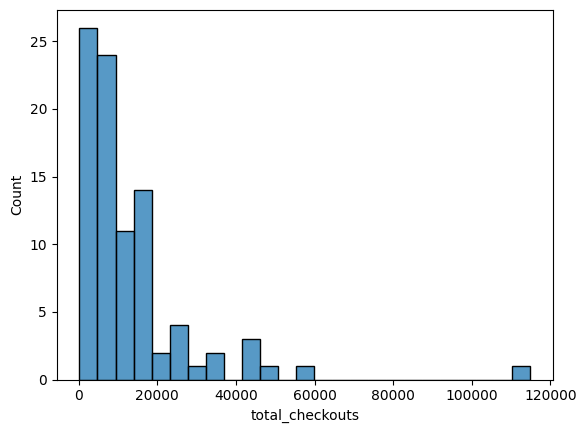

In [83]:
#Explore potential issues with the features (skew and outliers)
sns.histplot(kiosks['total_checkouts'])

<Axes: xlabel='total_returns', ylabel='Count'>

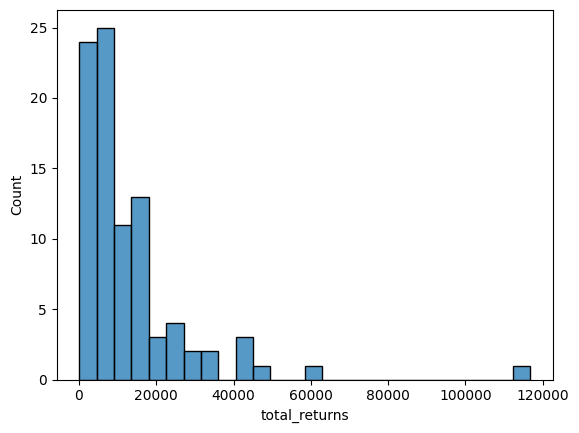

In [84]:
sns.histplot(kiosks['total_returns'])

<Axes: xlabel='total_checkouts', ylabel='Count'>

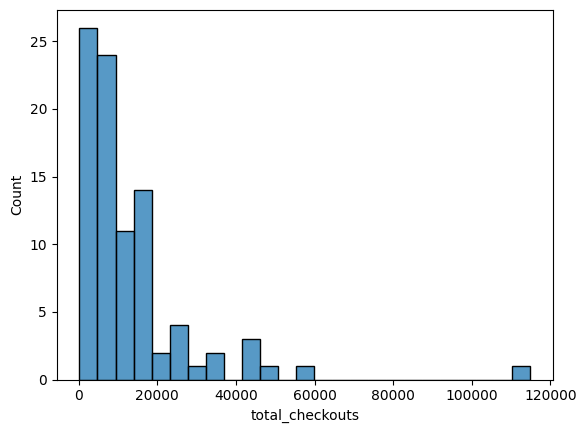

In [85]:
sns.histplot(kiosks['total_checkouts'])

### Box Plots

<Axes: ylabel='total_checkouts'>

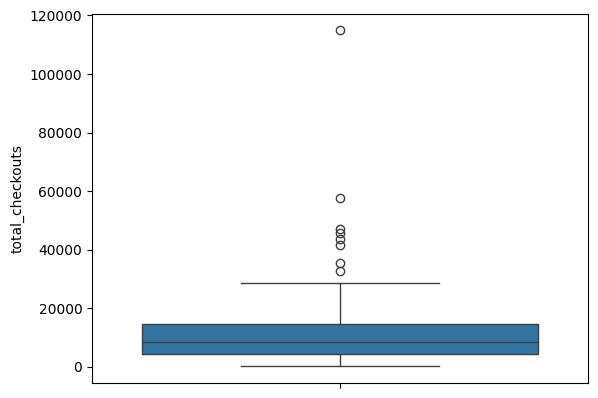

In [86]:
sns.boxplot(kiosks['total_checkouts'])

<Axes: ylabel='total_returns'>

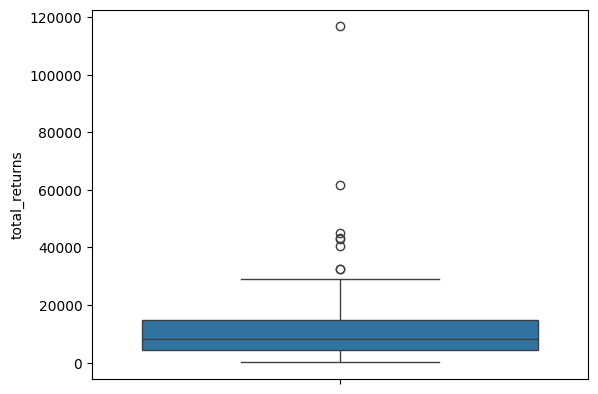

In [87]:
sns.boxplot(kiosks['total_returns'])

<Axes: ylabel='total_activity'>

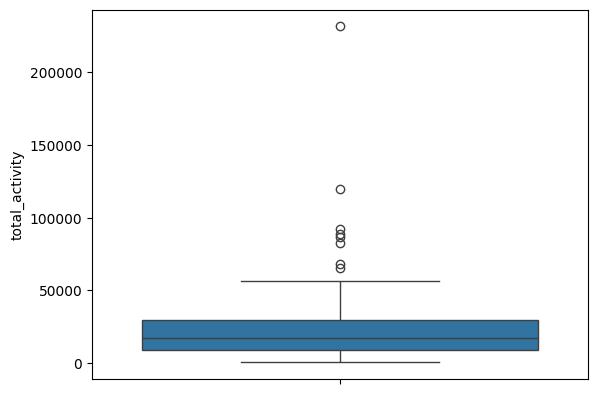

In [88]:
sns.boxplot(kiosks['total_activity'])

### Apply Log Transformation

In [60]:
#Import numpy
import numpy as np

#Create a copy of the dataframe
kiosks_log = kiosks.copy()

#Apply log transformation
kiosks_log[['total_checkouts', 'total_returns', 'total_activity']] = np.log1p(kiosks[['total_checkouts', 'total_returns', 'total_activity']])

#View result
kiosks_log.head()

,kiosk,total_checkouts,total_returns,total_activity,latitude,longitude
0,21st & Speedway @ PCL,11.651983,11.668107,12.353220,30.283,-97.7375
1,Dean Keeton & Speedway,10.963411,11.029699,11.690243,30.28953,-97.73695
2,28th & Rio Grande,10.758435,10.716504,11.430826,30.29290,-97.74387
3,26th & Nueces,10.729547,10.667978,11.392372,30.29068,-97.74292
4,Dean Keeton & Whitis,10.685012,10.674359,11.372835,30.2898,-97.74041


### Re-check histograms

<Axes: xlabel='total_checkouts', ylabel='Count'>

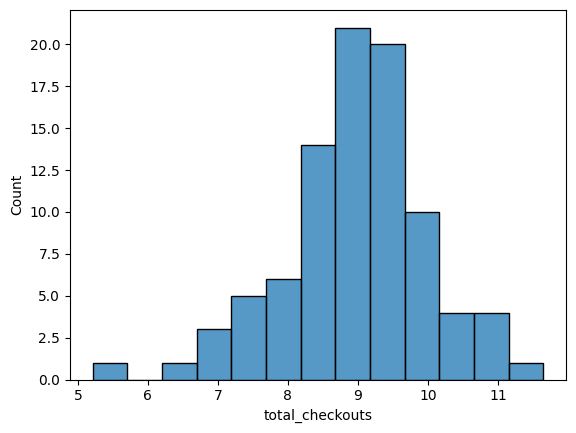

In [90]:
sns.histplot(kiosks_log['total_checkouts'])

<Axes: xlabel='total_returns', ylabel='Count'>

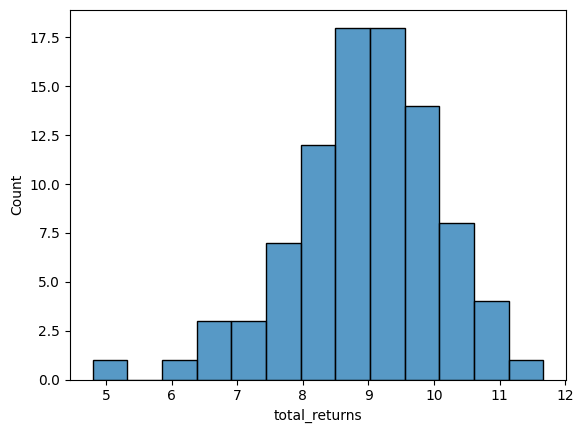

In [91]:
sns.histplot(kiosks_log['total_returns'])

<Axes: xlabel='total_activity', ylabel='Count'>

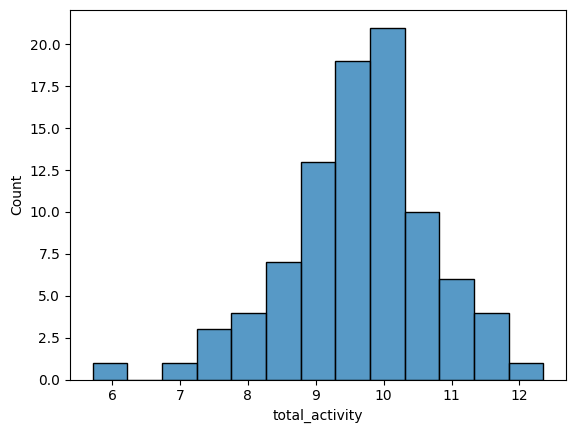

In [92]:
sns.histplot(kiosks_log['total_activity'])

### Recheck box plots

<Axes: ylabel='total_checkouts'>

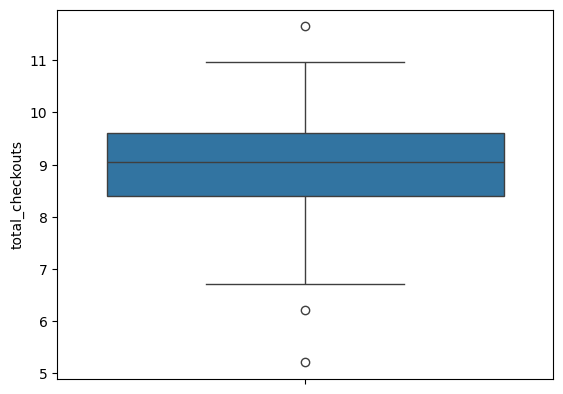

In [93]:
sns.boxplot(kiosks_log['total_checkouts'])

<Axes: ylabel='total_returns'>

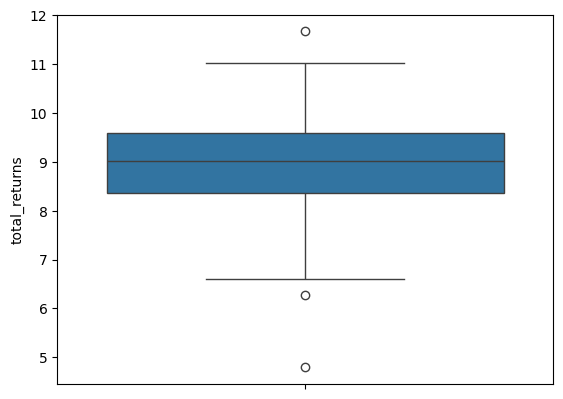

In [94]:
sns.boxplot(kiosks_log['total_returns'])

<Axes: ylabel='total_activity'>

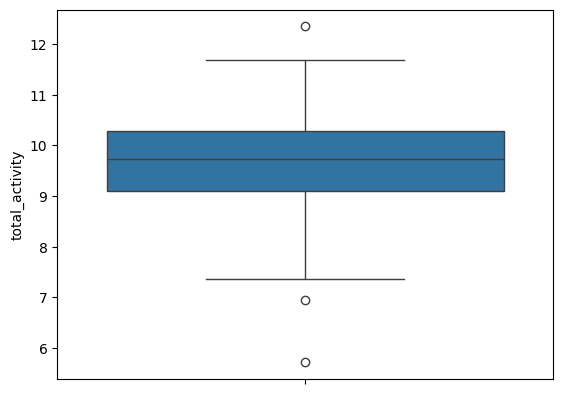

In [95]:
sns.boxplot(kiosks_log['total_activity'])

## Scaling Features

In [61]:
#Make a copy of the log dataset for easier interpreation after clustering
kiosks2 = kiosks_log.copy()

In [62]:
#Import min-max scaler from scikit learn
from sklearn.preprocessing import MinMaxScaler

#Initialize list of columns to scale
scaled_columns = ['total_checkouts', 'total_returns', 'total_activity']

#Initialize scaler
scaler = MinMaxScaler()

#Apply scaler to chosen columns
kiosks2[scaled_columns] = scaler.fit_transform(kiosks2[scaled_columns])

In [63]:
#Check result
kiosks2.head()

,kiosk,total_checkouts,total_returns,total_activity,latitude,longitude
0,21st & Speedway @ PCL,1.000000,1.000000,1.000000,30.283,-97.7375
1,Dean Keeton & Speedway,0.893120,0.907104,0.900146,30.28953,-97.73695
2,28th & Rio Grande,0.861304,0.861531,0.861074,30.29290,-97.74387
3,26th & Nueces,0.856820,0.854470,0.855283,30.29068,-97.74292
4,Dean Keeton & Whitis,0.849907,0.855398,0.852340,30.2898,-97.74041


# Begin Clustering

## Visualize Potential Clusters

In [99]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

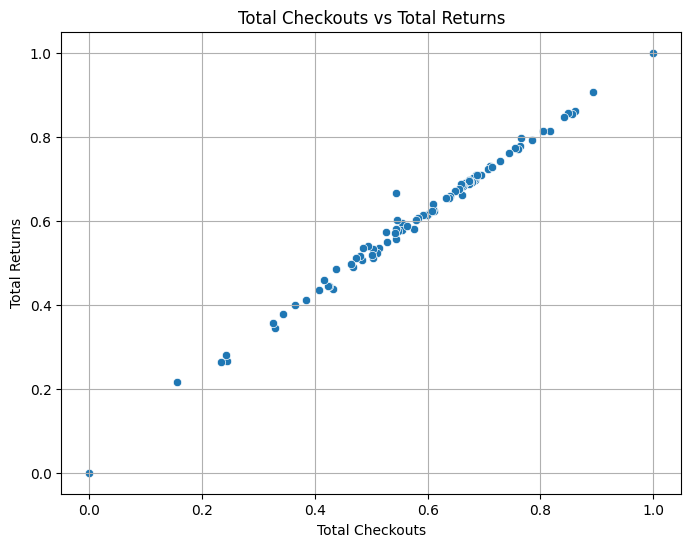

In [100]:
#Total checkouts vs total returns

#Set figure size
plt.figure(figsize=(8,6))

#Create a scatter plot
sns.scatterplot(x='total_checkouts', y='total_returns', data=kiosks2)
plt.title('Total Checkouts vs Total Returns')
plt.xlabel('Total Checkouts')
plt.ylabel('Total Returns')
plt.grid()
plt.show()

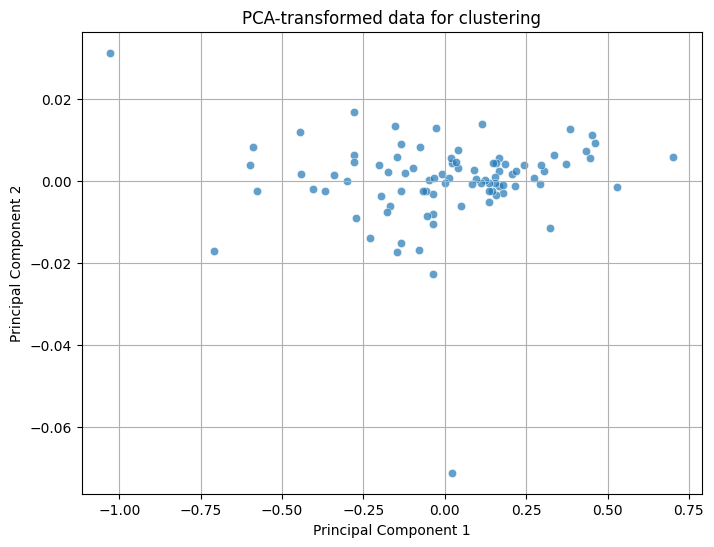

In [101]:
#Create graph for Principal Componet Analysis

#Import PCA
from sklearn.decomposition import PCA

#Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(kiosks2[['total_checkouts', 'total_returns', 'total_activity']])

#Convert PCA result into a dataframe
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

#Scatter plot to visualize clusters

#First set figure size
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-transformed data for clustering')
plt.grid()

#Display result
plt.show()

## Find Optimal Amount of Clusters using the Elbow Method

In [64]:
#Import libraries
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

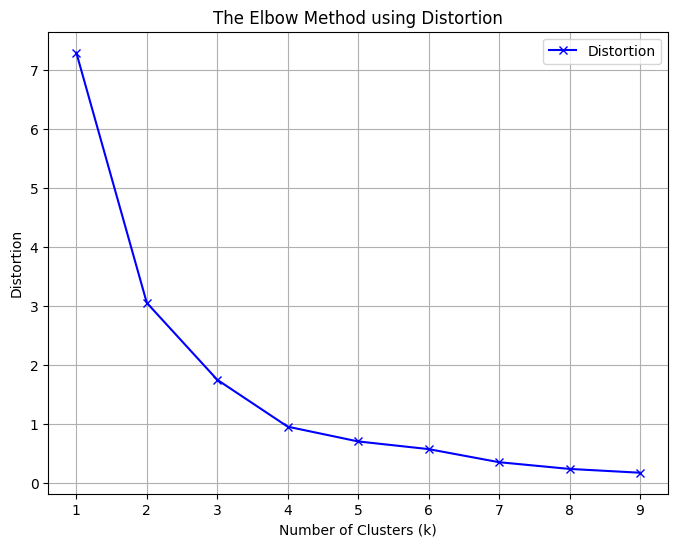

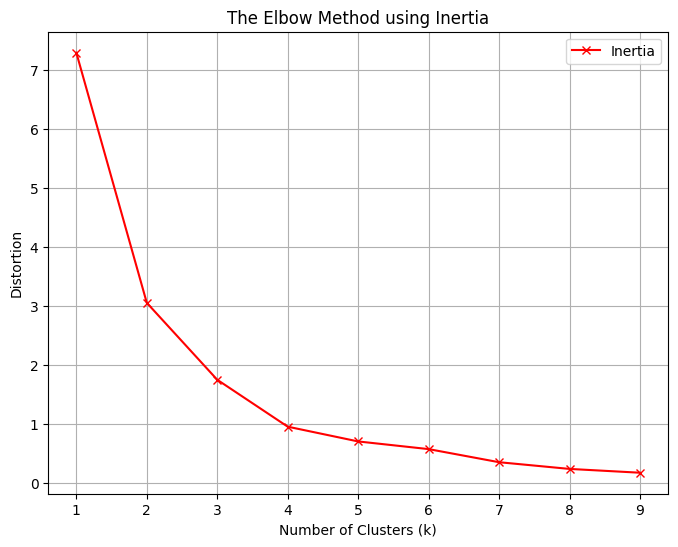

In [103]:
#Select features
X_selected = kiosks2[['total_checkouts', 'total_returns', 'total_activity']]

#Initialize list to store distortions and inertia values
distortions = []
inertia = []
K = range(1,10)

#Fit K-Means for different values of K
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X_selected)

    #Calculate distortions
    distortions.append(sum(np.min(cdist(X_selected, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2))

    #Intertia is calculated directly from K-Means
    inertia.append(kmeanModel.inertia_)

#Plotting the Elbow Method for distortion
plt.figure(figsize=(8,6)) #Set figure size
plt.plot(K, distortions, 'bx-', label='Distortion')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid()
plt.legend()
plt.show()

#Plotting the Elbow Method for inertia
plt.figure(figsize=(8,6)) #Set figure size
plt.plot(K, inertia, 'r-x', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.legend()
plt.show()

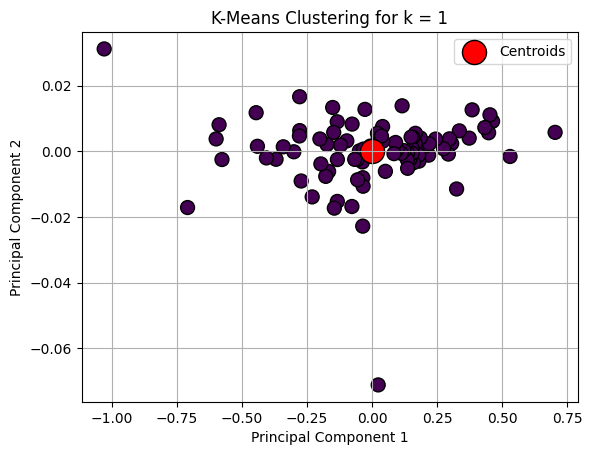

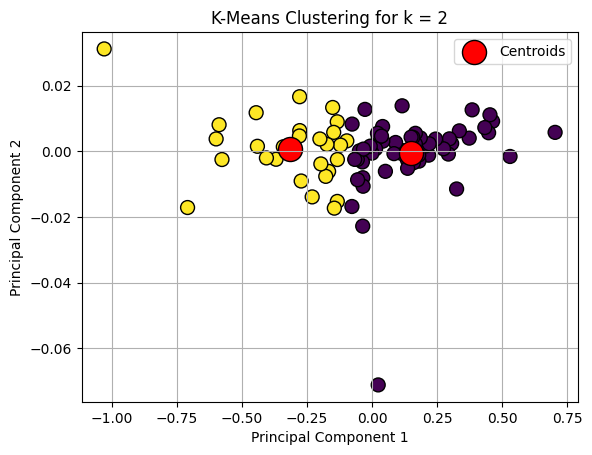

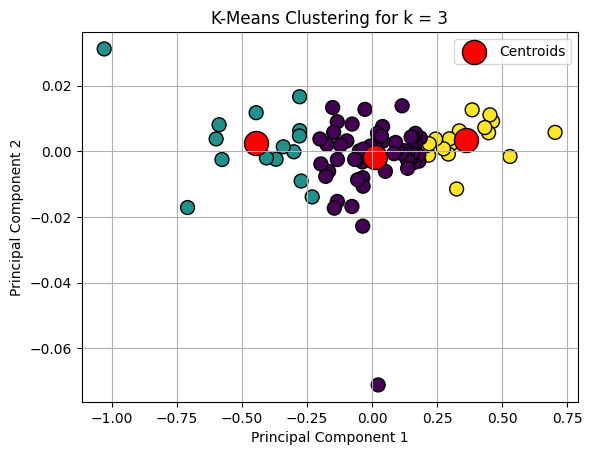

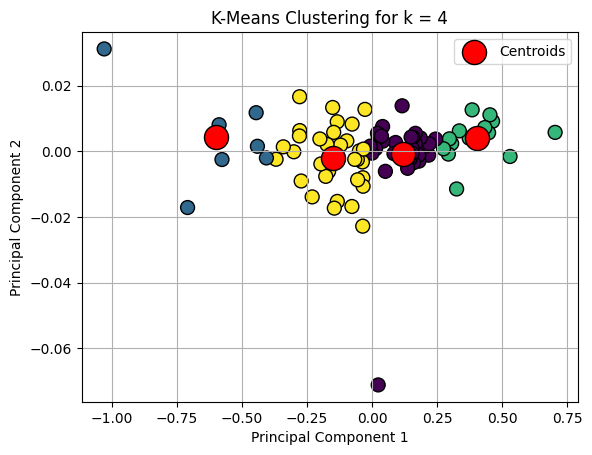

In [105]:
#Plot values of different valus of K

#Initialize X_selected
X_selected = kiosks2[['total_checkouts', 'total_returns', 'total_activity']]

#Initialize a range of k values
k_range = range(1,5)

#Use PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

#Fit and plot the data for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_means = kmeans.fit_predict(X_pca)

    #Plot the clustered data points
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y_means, cmap='viridis', marker='o', edgecolors='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', label='Centroids', edgecolors='k')
    plt.title(f'K-Means Clustering for k = {k}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid()
    plt.show()

## Apply Clusters to dataset

In [65]:
#Initialize X_selected
X_selected = kiosks2[['total_checkouts', 'total_returns', 'total_activity']]

In [66]:
#Fit K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X_selected)

In [67]:
#Add clusters to Kiosks dataframe
kiosks['cluster'] = y_means

In [66]:
#Display cluster centers
print('Cluster Centers:')
print(kmeans.cluster_centers_)

Cluster Centers:
[[0.58879207 0.61387832 0.60087425]
 [0.32258441 0.35131036 0.33590709]
 [0.79770748 0.80816088 0.80260653]]


In [67]:
#Check result
kiosks.head()

,kiosk,total_checkouts,total_returns,total_activity,latitude,longitude,cluster
0,21st & Speedway @ PCL,114918,116786,231704,30.283,-97.7375,2
1,Dean Keeton & Speedway,57722,61678,119400,30.28953,-97.73695,2
2,28th & Rio Grande,47024,45093,92117,30.29290,-97.74387,2
3,26th & Nueces,45685,42957,88642,30.29068,-97.74292,2
4,Dean Keeton & Whitis,43695,43232,86927,30.2898,-97.74041,2


In [110]:
#Interpret the clusters using a groupby
cluster_means = kiosks.groupby('cluster')[['total_checkouts', 'total_returns', 'total_activity']].mean()
cluster_means

,total_checkouts,total_returns,total_activity
cluster,,,
0,8985.70,9093.68,18079.02
1,1802.19,1712.00,3514.19
2,35649.44,35692.39,71341.83


In [115]:
#Interpret the cluser using a groupby and median
cluster_median = kiosks.groupby('cluster')[['total_checkouts', 'total_returns', 'total_activity']].median()
cluster_median

,total_checkouts,total_returns,total_activity
cluster,,,
0,8033.50,8190.50,16666.50
1,1794.00,1745.50,3539.50
2,27002.00,28463.50,55465.50


In [ ]:
#Analyze min and max for outliers
kiosks.groupby('cluster')[['total_checkouts', 'total_returns', 'total_activity']].agg(['min', 'max'])

total_checkouts         total_returns         total_activity        
                    min     max           min     max            min     max
cluster                                                                     
0                  3655   16077          3501   15911           7232   31765
1                   182    3077           120    3398            302    6475
2                 17338  114918         17348  116786          34686  231704

In [68]:
#Check how many kiosk there are in each cluster
kiosks['cluster'].value_counts()

cluster
0    56
2    18
1    16
Name: count, dtype: int64

In [112]:
#Check out Kiosk that are in cluster 0
cluster_zero = kiosks[kiosks['cluster'] == 0]
cluster_zero['kiosk'].unique()

array(['22.5 & Rio Grande', 'Nueces @ 3rd', 'Boardwalk West',
       'Lakeshore & Pleasant Valley',
       '3rd & Trinity @ The Convention Center', '5th & Bowie',
       'Veterans & Atlanta @ MoPac Ped Bridge', '2nd & Congress',
       'Plaza Saltillo', 'Nash Hernandez & East @ RBJ South',
       '2nd & Lavaca @ City Hall',
       'Barton Springs & Bouldin @ Palmer Auditorium',
       'East 6th & Medina', '4th & Congress',
       '11th & Congress @ The Texas Capitol', 'Sterzing & Barton Springs',
       'South Congress & Barton Springs @ The Austin American-Statesman',
       'Long Center @ South 1st & Riverside', 'Cesar Chavez & Congress',
       'Barton Springs Pool', 'South Congress @ Bouldin Creek',
       '16th & San Antonio', 'Barton Springs @ Kinney Ave',
       'Red River & Cesar Chavez @ The Fairmont', '23rd & Rio Grande',
       '4th & Guadalupe @ Republic Square',
       'Lake Austin Blvd @ Deep Eddy', '9th & Henderson',
       '6th & Chalmers', '8th & Congress', '5th & Camp

In [113]:
#Check out Kiosk that are in Cluster 1
cluster_one = kiosks[kiosks['cluster'] == 1]
cluster_one['kiosk'].unique()

array(['Dean Keeton & Park Place', 'East 11th & Victory Grill',
       '11th & Salina', '10th & Red River',
       'East 5th & Shady @ Eastside Bus Plaza', 'Rosewood & Angelina',
       '13th & Trinity @ Waterloo Greenway', 'Barton Springs & Riverside',
       'Rosewood & Chicon', 'One Texas Center',
       'UT West Mall @ Guadalupe', '17th & Guadalupe',
       'Davis at Rainey Street', '13th & San Antonio', '13th & Trinity',
       '1701 Barton Springs Road'], dtype=object)

In [114]:
#Check out Kiosk that are in Cluster 2
cluster_two = kiosks[kiosks['cluster'] == 2]
cluster_two['kiosk'].unique()

array(['21st & Speedway @ PCL', 'Dean Keeton & Speedway',
       '28th & Rio Grande', '26th & Nueces', 'Dean Keeton & Whitis',
       '21st & Guadalupe', '22nd & Pearl',
       'Guadalupe & West Mall @ University Co-op', 'Rainey St @ Cummings',
       '23rd & San Jacinto @ DKR Stadium', '21st & University',
       'Riverside & South Lamar', '3rd & West',
       'Lakeshore @ Austin Hostel', '23rd & Pearl', 'Zilker Park',
       '6th & Congress',
       'Electric Drive & Sandra Muraida Way @ Pfluger Ped Bridge'],
      dtype=object)

In [70]:
#Save to csv file
kiosks.to_csv('clustered_capmetro_bike_kiosks.csv',index=False)

## Visualize bike demand per cluster

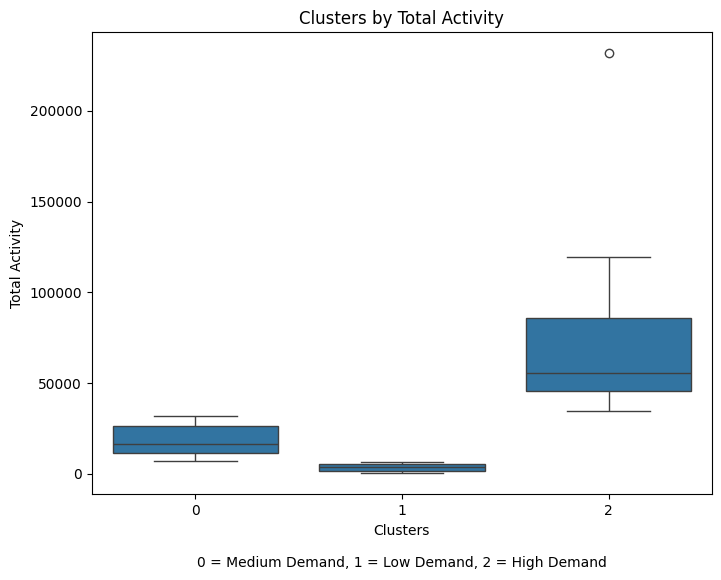

In [119]:
#Total activity by cluster boxplot
plt.figure(figsize=(8,6)) #Set figure size
sns.boxplot(x='cluster', y='total_activity', data=kiosks)
plt.title('Clusters by Total Activity')
plt.xlabel('Clusters\n\n0 = Medium Demand, 1 = Low Demand, 2 = High Demand')
plt.ylabel('Total Activity')
plt.show()

## Folium Map of Austin

In [69]:
#Import folium
import folium

In [70]:
#Define Austin Coordinates
austin_coordinates = [30.2672, -97.7431] #Latitud and Longitude of Austin Texas

In [123]:
#Check kiosks dataframe to make sure latitude and longitude are floats
print(kiosks['latitude'].dtype)
print(kiosks['longitude'].dtype)

object
object


In [71]:
#Convert to floats
kiosks['latitude'] = kiosks['latitude'].astype(float)
kiosks['longitude'] = kiosks['longitude'].astype(float)

In [72]:
#Recheck results
print(kiosks['latitude'].dtype)
print(kiosks['longitude'].dtype)

float64
float64


In [126]:
#Check unique values
print(kiosks['latitude'].unique())
print(kiosks['longitude'].unique())

[30.283    30.28953  30.2929   30.29068  30.2898   30.28395  30.2853
 30.28576  30.255906 30.2856   30.28354  30.26446  30.2678   30.24472
 30.28734  30.2659   30.26822  30.26717  30.28613  30.26694  30.25457
 30.24258  30.26426  30.2696   30.27466  30.26408  30.26217  30.252
 30.26476  30.25971  30.26455  30.26634  30.2726   30.26406  30.25839
 30.25941  30.26332  30.26452  30.25495  30.27924  30.262    30.26214
 30.28728  30.26753  30.27807  30.27217  30.26269  30.2698   30.27489
 30.27041  30.24891  30.26139  30.25987  30.264327 30.25226  30.26735
 30.2874   30.25103  30.26854  30.25895  30.26754  30.260814 30.26032
 30.26968  30.27059  30.2563   30.27336  30.25542  30.24506  30.26912
 30.29439  30.2764   30.27193  30.268887 30.289455 30.26896  30.26638
 30.27024  30.25212  30.26888  30.27392  30.2587   30.26969  30.25743
 30.27974  30.26083  30.27616  30.2741   30.26275 ]
[-97.7375   -97.73695  -97.74387  -97.74292  -97.74041  -97.74198
 -97.7467   -97.74181  -97.739949 -97.7335   

In [73]:
#Subset kiosk dataframe 
kiosk_map = kiosks[['kiosk', 'latitude', 'longitude', 'total_activity', 'cluster']]

#Check result
kiosk_map.head()

,kiosk,latitude,longitude,total_activity,cluster
0,21st & Speedway @ PCL,30.28300,-97.73750,231704,2
1,Dean Keeton & Speedway,30.28953,-97.73695,119400,2
2,28th & Rio Grande,30.29290,-97.74387,92117,2
3,26th & Nueces,30.29068,-97.74292,88642,2
4,Dean Keeton & Whitis,30.28980,-97.74041,86927,2


In [74]:
#Define cluster categories
cluster_labels = {
    0: 'Medium',
    1: 'Low',
    2: 'High'
}

In [75]:
#Define cluster colors
cluster_colors = {
    'Medium': 'blue', 
    'Low': 'green', 
    'High': 'red', 
}

In [76]:
#Create folium map

#Initialize the map
map = folium.Map(location=austin_coordinates, zoom_start=12)

#Loop through each kiosk and plot it
for _, row in kiosk_map.iterrows():
    demand_label = cluster_labels[row['cluster']] #Conver the numbers into labels (i.e. high, med, low)
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius = 6,
        color=cluster_colors[demand_label], #Assign colors to different clusters
        fill=True,
        fill_color = cluster_colors[demand_label],
        fill_opacity = 0.7,
        popup=f"Kiosk: {row['kiosk']} | Demand: {demand_label} | Activity: {row['total_activity']}"
    ).add_to(map)

#Save map
map.save('austin_capmetro_bike_demand_map.html')

#Display
map

# Reccomend New Bike Stations 

## Proximity Based Expansion

In [6]:
#Import pandas
import pandas as pd

#Load in clustered kiosks dataframe
kiosks = pd.read_csv('clustered_capmetro_bike_kiosks.csv')

#Display head
kiosks.head()

,kiosk,total_checkouts,total_returns,total_activity,latitude,longitude,cluster
0,21st & Speedway @ PCL,114918,116786,231704,30.28300,-97.73750,2
1,Dean Keeton & Speedway,57722,61678,119400,30.28953,-97.73695,2
2,28th & Rio Grande,47024,45093,92117,30.29290,-97.74387,2
3,26th & Nueces,45685,42957,88642,30.29068,-97.74292,2
4,Dean Keeton & Whitis,43695,43232,86927,30.28980,-97.74041,2


In [7]:
#Extract high demand and medium demand kiosks
high_demand = kiosks[kiosks['cluster'] == 2][['latitude', 'longitude']].values
medium_demand = kiosks[kiosks['cluster'] == 0][['latitude', 'longitude']].values

In [9]:
#Import scipy in order to compute the distances between the kiosks
from scipy.spatial import distance_matrix

#Compute the distance between high and medium demand kiosks 
dist_matrix = distance_matrix(high_demand, medium_demand)

In [11]:
#Find the gaps between the kiosks

#Import numpy
import numpy as np

#Set a threshold which can be adjusted
distance_threshold = 0.005 #500 meters

#Identify pairs that have a gap larger than the threshold
gap_indices = np.where(dist_matrix > distance_threshold)

#Extract unique locations where gaps exist
high_gap_locs = high_demand[np.unique(gap_indices[0])]
medium_gap_locs = medium_demand[np.unique(gap_indices[1])]

In [12]:
#Find the nearest medium demand kiosk for each high-demand gap

#Import package from scipy
from scipy.spatial import cKDTree

#Build KDTree for efficient nearest neighbor search
medium_tree = cKDTree(medium_demand)

#Find the closest medium demand kiosk for each high demand gap
nearest_medium_indices = medium_tree.query(high_gap_locs, k=1)[1]

#Select corresponding medium-demand locations
matched_medium_locs = medium_demand[nearest_medium_indices]

In [18]:
#Suggest New Kiosks

#Compute the midpoint between high-gaps and closests medium-demand kiosks
new_kiosk_suggestions = (high_gap_locs + matched_medium_locs) / 2

#Convert to dataframe
new_kiosks_df = pd.DataFrame(new_kiosk_suggestions, columns=['latitude', 'longitude'])

In [20]:
#Create map using folium 

#Import folium
import folium

#Define austin coorindates
austin_coordinates = [30.2672, -97.7431] #Latitude and Longitude of Austin, Texas

#Subset Kiosk dataframe
kiosk_map = kiosks[['kiosk', 'latitude', 'longitude', 'total_activity', 'cluster']]

#Define cluster cateogories
cluster_labels = {
    0: 'Medium',
    1: 'Low',
    2: 'High'
}

#Define cluster colors
cluster_colors = {
    'Medium': 'blue',
    'Low': 'green',
    'High': 'red'
}

#Initialize the map
map = folium.Map(location=austin_coordinates, zoom_start=12)

#Loop through each kiosk and plot it
for _, row in kiosk_map.iterrows():
    demand_label = cluster_labels[row['cluster']]
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color=cluster_colors[demand_label],
        fill=True,
        fill_color=cluster_colors[demand_label],
        fill_opacity=0.7,
        popup=f"Kiosk: {row['kiosk']} | Demand: {demand_label} | Activity: {row['total_activity']}"
    ).add_to(map)

#Add suggested new kiosk locations
for _, row in new_kiosks_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color='purple', icon='plus', prefix='fa'),
        popup=f"Suggested New Kiosk | Location: {row['latitude']}, {row['longitude']}"
    ).add_to(map)

#Save map
map.save('Newly Suggested Kiosks.html')

#Display
map

## Density Analysis Heatmap

In [14]:
#Import libraries
import folium 
import folium.map
from folium.plugins import HeatMap

#Center the map around the average coordinates
map_center = [kiosks['latitude'].mean(), kiosks['longitude'].mean()]
bike_map = folium.Map(location=map_center, zoom_start=13)

#Extract high and medium demand kiosks for heatmap
heat_data = kiosks[kiosks['cluster'].isin([2,0])][['latitude','longitude']].values.tolist()

#Create heatmap

#Add heatmap layer
HeatMap(heat_data, radius=15).add_to(bike_map)

#Save the heatmap
bike_map.save('kiosks_heatmap.html')

#Display
bike_map

# Correct Mistake

In [1]:
#Import libraries
import pandas as pd

#Read in csv file
df = pd.read_csv('clustered_capmetro_bike_kiosks.csv')

#Display head
df.head()

,kiosk,total_checkouts,total_returns,total_activity,latitude,longitude,cluster
0,21st & Speedway @ PCL,114918,116786,231704,30.28300,-97.73750,2
1,Dean Keeton & Speedway,57722,61678,119400,30.28953,-97.73695,2
2,28th & Rio Grande,47024,45093,92117,30.29290,-97.74387,2
3,26th & Nueces,45685,42957,88642,30.29068,-97.74292,2
4,Dean Keeton & Whitis,43695,43232,86927,30.28980,-97.74041,2


In [3]:
#Find kiosks containing Guad
df[df['kiosk'].str.contains('Guad') & df['kiosk'].str.contains('West Mall')]

,kiosk,total_checkouts,total_returns,total_activity,latitude,longitude,cluster
7,Guadalupe & West Mall @ University Co-op,32712,32602,65314,30.28576,-97.74181,2
84,UT West Mall @ Guadalupe,1489,1390,2879,30.28576,-97.74201,1


In [4]:
#Add together the values from index 84 to 7
df.loc[7, 'total_checkouts'] += 1489
df.loc[7, 'total_returns']  += 1390
df.loc[7, 'total_activity'] += 2879

#Drop index 84
df = df.drop(84).reset_index(drop=True)

In [5]:
#Save to dataframe
df.to_csv('clustered_capmetro_bike_kiosks_2.csv')

In [7]:
#Redo folium map

#Import folium
import folium

#Define Austin Coordinates
austin_coordinates = [30.2672, -97.7431] #Latitude and Longitude of Austin Texas

#Subset dataframe 
kiosk_map = df[['kiosk', 'latitude', 'longitude', 'total_activity', 'cluster']]

#Define cluster categories
cluster_labels = {
    0: 'Medium',
    1: 'Low',
    2: 'High'
}

#Define cluster colors
cluster_colors = {
    'Medium': 'blue', 
    'Low': 'green', 
    'High': 'red', 
}

#Create folium map

#Initialize the map
map = folium.Map(location=austin_coordinates, zoom_start=12)

#Loop through each kiosk and plot it
for _, row in kiosk_map.iterrows():
    demand_label = cluster_labels[row['cluster']] #Conver the numbers into labels (i.e. high, med, low)
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius = 6,
        color=cluster_colors[demand_label], #Assign colors to different clusters
        fill=True,
        fill_color = cluster_colors[demand_label],
        fill_opacity = 0.7,
        popup=f"Kiosk: {row['kiosk']} | Demand: {demand_label} | Activity: {row['total_activity']}"
    ).add_to(map)

#Save map
map.save('austin_capmetro_bike_demand_map.html')

#Display
map